# Binary classification visualizations

In this notebook we want to implement our first neural network in tensorflow. Therefore we first have a look at [Tensorflow Playground](https://playground.tensorflow.org)


<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

**Small Exercise:** We want to implement the Circle Datatype. Therefore just play with the Playground, add Neurons and layers and see what happens.

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

## Settings
Here we define some settings for our network

In [2]:
import shutil

# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1
# number of iterations of the model
N_EPOCHS = 50

# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 1.5
GRID_Y_START = -1.5
GRID_Y_END = 1.5
# output directory is created if not available
OUTPUT_DIR = "02_tensorflow_playground_visualization"

if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
    os.makedirs(OUTPUT_DIR)
    
else:
    os.makedirs(OUTPUT_DIR)


## Create the Circle dataset
We will create the training and test dataset. Therefor we use the `train_test_split` function

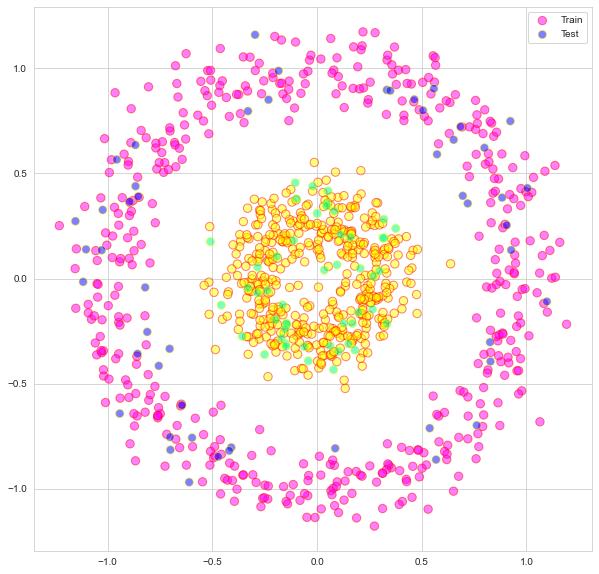

In [3]:
# We create circle data with a scale factor of 0.3 for inner and outer circle and add Noise to the data
X, y = make_circles(n_samples=N_SAMPLES, factor=.3, noise=.10)

# We split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

# Plot the figure
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=70, cmap=plt.cm.spring, edgecolors='red', alpha=0.5, label="Train");
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), s=70, cmap=plt.cm.winter, edgecolors='yellow', alpha=0.5, label="Test");
plt.legend()
plt.show()

### Definition of grid boundaries and storage of loss and accuracy history

In [4]:
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
acc_history = []
loss_history = []

### Auxiliary functions

In [5]:
# precede the number with zeros, creating a thong of a certain length
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

# the auxiliary function forming graphs of classification boundaries and change of accuracy
def save_model_prediction_graph(epoch, logs):
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    plt.title('Binary classification with Tensorflow - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
    plt.savefig("./" + OUTPUT_DIR + "/tf_" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()
    
    acc_history.append(logs['accuracy'])
    loss_history.append(logs['loss'])
    plt.figure(figsize=(12,8))
    sns.set_style("whitegrid")
    plt.plot(acc_history)
    plt.plot(loss_history)
    plt.title('Model accuracy and loss - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xlim([0,N_EPOCHS])
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.savefig("./" + OUTPUT_DIR + "/loss_acc_" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()

## Model definition
Now we will define our fully connected Sequential model.

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

**Small Exercise:** 

                  1. Try to build a neural network model as in Tensorflow Playground 
                     1.1 Add hidden layers (model.add(Dense(NumberOfNeurons, activation='activation_name'))
                     2.1 Modify the activation function,  the optimizer and learning rate.
                     2.1 Check how many epochs you need to
                  2. What happens to the output Gif if you use different activation functions
                  3. If necessary modify the Hyperparameters (N_SAMPLES, TEST_SIZE, N_EPOCHS) in Settings
                     3.1 Can you reduce the number of Training Epochs? If yes, why?
                     3.2 Use EarlyStopping callback and check the accuracy when modifying the **patience** parameter

In [6]:
tf.keras.backend.clear_session()
# List of activation functions
acti_list = [
             tf.keras.activations.relu,
             tf.keras.activations.tanh,
             tf.keras.activations.elu,
            ]

# Choose an activation function
acti = acti_list[1]  # 
print(f"Using Activation: {acti.__name__}\n")

# Creating a Sequential model
model = Sequential()
model.add(Dense(4, input_dim=2,activation=acti))
############ YOUR CODE HERE ############

model.add(Dense(1, activation='sigmoid'))
model.summary()

Using Activation: tanh

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Adding a callback function that plots images at every epoch
testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=save_model_prediction_graph)
# patience: Number of epochs with no improvement after which training will be stopped.
earlystoppingcb = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3, verbose=1, mode="min",min_delta=1e-2)

## Train the network
We will use `binary_crossentropy` because we have a model of two classes (The inner and the outer cycle)

In [8]:
LEARNING_RATE = 0.001
# List of optimizers
opti_list = [
             tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
             tf.keras.optimizers.Adamax(learning_rate=LEARNING_RATE),
             tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
            ]

# Choose an optimizer
opti = opti_list[0]
print(f"Using Optimizer: {opti.__class__.__name__}")

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=opti, metrics=['accuracy'])

Using Optimizer: Adam


In [9]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0, callbacks=[testmodelcb,
                                                                             #earlystoppingcb
                                                                            ])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Please use `model.predict()` instead.
Test loss: 0.5953823328018188
Test accuracy: 0.8700000047683716


## Create a Gif 
We want to create a gif of our stored output to see what happens at every epoch

In [10]:
import glob
from PIL import Image

def create_gif(name,output):
    # filepaths
    fp_in = os.path.join(os.getcwd(),OUTPUT_DIR+os.sep)+name+"*.png"
    fp_out = os.path.join(os.getcwd(),OUTPUT_DIR+os.sep)+name+output+".gif"

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
    gif = img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=200, loop=0)
    
    # Remove all png files
    [os.remove(f) for f in sorted(glob.glob(fp_in))]

    return fp_out

tf_gif = create_gif("tf",f"_{opti.__class__.__name__.lower()}_{acti.__name__}")
loss_acc_gif = create_gif("loss_acc",f"_{opti.__class__.__name__.lower()}_{acti.__name__}")

In [11]:
import ipywidgets as widgets
import IPython.display as display
## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img1 = open(tf_gif, 'rb').read()
img2 = open(loss_acc_gif, 'rb').read()
## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi1 = widgets.Image(value=img1, format='png')#, width=500, height=500)
wi2 = widgets.Image(value=img2, format='png')#, width=500, height=100)
## Side by side thanks to HBox widgets
sidebyside = widgets.HBox([wi1, wi2])
## Finally, show.
display.display(sidebyside)